# DarkNet Market Exploration

In [2]:
import os
import math
import copy
from datetime import datetime
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from itertools import compress
from spacy.lang.en import English


## Load dataset

In [3]:
# Read the text file
product_rating_table = pd.read_csv('product_rating_modified.txt', header = None, sep = '\', \'', engine = 'python')
#product_descriptions.columns = ['trans_id', 'mkt_id', 'vendor_id','vendor_name', 'buyer_name', \
                                #'rating', 'comment', 'date', 'bitcoin_amt', 'USD', 'EUR', \
                                #'buyer_#_orders', 'buyer_value_orders', 'product_id', 'product_mkt_id', 'product_title']

In [4]:
# Remove unnecessary columns
data_df = copy.deepcopy(product_rating_table.iloc[:,[0,1,2,3,4,5,6,7,8,9,15]]) # 11 columns
data_df.columns = ['trans_id', 'mkt_id', 'vendor_id','vendor_name', 'buyer_name', \
                    'rating', 'comment', 'post_date', 'bitcoin_amt', 'USD', 'product_title']

In [31]:
data_df[data_df.mkt_id == 5]

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,post_date,bitcoin_amt,USD,product_title
2826,'3924,5,2647,eee099338c88f65006f24063ff3aca46,d***e,5.0,"FFT best vendor dealt with, professional and a...",20180411154023,-1.0,-1.0,*LIMITED* 7 grams CRAZY CARTEL COKE (CCC)
2827,'3925,5,2647,eee099338c88f65006f24063ff3aca46,r***9,5.0,Great vendor and products.,20180106003052,-1.0,-1.0,*LIMITED* 7 grams CRAZY CARTEL COKE (CCC)
2828,'3926,5,2648,acc3ebb6a498d7b138f3242e235cf65e,s***h,5.0,No message leaved,20181007144938,-1.0,-1.0,? 1g Ketamine High Quality 87% ? EC LABTESTED ...
2829,'3927,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,Best shop is here! Delivery always fast and st...,20180830122846,-1.0,-1.0,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2830,'3928,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,"Best quality ever! \nFastest delivery, Super s...",20180806051408,-1.0,-1.0,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2831,'3929,5,2648,acc3ebb6a498d7b138f3242e235cf65e,A***9,5.0,"Very high quality K, good stealth",20180628125023,-1.0,-1.0,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2832,'3930,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,5.0,"Best Vendor Ever!\nGreat Ketamine quality, sup...",20180525161910,-1.0,-1.0,? 5g Ketamine High Quality 87% ?EC LABTESTED ...
2833,'3931,5,2648,acc3ebb6a498d7b138f3242e235cf65e,v***i,0.0,"ordered 10g - it\'s never arrived, vendor agre...",20181025120606,-1.0,-1.0,? 10g Ketamine High Quality 87% ? EC LABTEST...
2834,'3932,5,2648,acc3ebb6a498d7b138f3242e235cf65e,T***2,5.0,TOP,20180607171603,-1.0,-1.0,? 10g Ketamine High Quality 87% ? EC LABTEST...
2835,'3933,5,2648,acc3ebb6a498d7b138f3242e235cf65e,T***g,5.0,All good. Quality vendor - RECOMMENDED.,20180531142437,-1.0,-1.0,? 10g Ketamine High Quality 87% ? EC LABTEST...


In [11]:
# Display the number of transactions on different market.
# 1. 92388; 2. 8902; 3. 9947; 4. 718; 5. 6007; 6. 1442; 10. 530.
#product_descriptions.groupby(1).count()

# Extract the transactions only from Market 1 (Dream Market).
data_df = data_df[data_df.iloc[:,1] == 1] # size = 92388 rows × 11 columns

# Investigate duplicate dates (Not happened in Mkt1)
#product_descriptions[product_descriptions.iloc[:,3] == 'dutch-christiana'].sort_values(by = 7).iloc[41:46,:]

## Process the date feature

In [12]:
# Shift the date format
# Function to convert numeric time to datetime object
def parseDate(raw_date, pattern = '%Y%m%d%H%M%S'):
    string_date = str(raw_date)
    return(datetime.strptime(string_date, pattern))

# Parse the dates, and place in new column
data_df['dates'] = data_df.iloc[:,7].apply(parseDate)

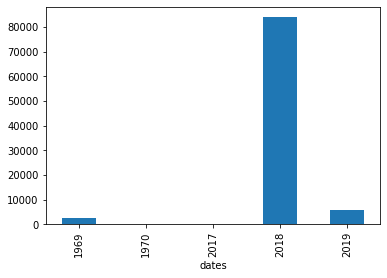

dates
1969     2457
1970        2
2017       25
2018    84014
2019     5890
Name: dates, dtype: int64

In [13]:
# Display distribution of years
data_df['dates'].groupby(data_df["dates"].dt.year).count().plot(kind='bar')
plt.show()
data_df['dates'].groupby(data_df["dates"].dt.year).count()
# Conclusion: most dates are in 2018. 1969 and 1970 are bad date (Should be removed).

In [14]:
# Filter out the date on 1969/1970/2017/2019
before_201901 = data_df['dates'] < datetime(2019,2,1)
after_201804 = data_df['dates'] > datetime(2018,4,1)
data_df = data_df[before_201901 & after_201804] # len = 89842
print(len(data_df))

89842


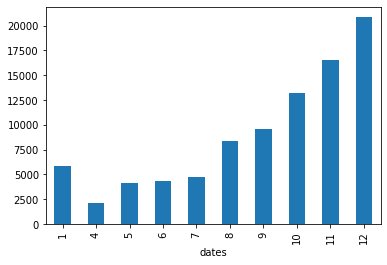

dates
1      5890
4      2103
5      4164
6      4316
7      4786
8      8382
9      9607
10    13225
11    16497
12    20872
Name: dates, dtype: int64


In [15]:
# Plot the dates along 12 months
data_df['dates'].groupby(data_df["dates"].dt.month).count().plot(kind='bar')
plt.show()
monthly_listings = data_df['dates'].groupby(data_df["dates"].dt.month).count()
print(monthly_listings)

## Process the drug feature

In [16]:
# Apply tokenizer to the titles in the dataframe
def tokenizer0(title):
    # tokenize titles by library
    tokens = parser(title.lower())
    tokens = [token.orth_ for token in tokens if not token.orth_.isspace()]
    return(tokens)

"""
# Alternative tokenizer
special_char =['`','\'','=','-','~','!','@','#','$','^','&','*','(',')','_','+','[',']','{','}',';','\\',':','|','<','<','>','?','//']

def remove_special_char(string):
    for char in special_char:
        string = string.replace(char,' ')
    return(string)

def tokenizer1(string):
    return remove_special_char(string).split()
"""

parser = English()
data_df['tokenized_titles'] = data_df['product_title'].apply(tokenizer0) # The 10th column: product title


In [17]:
# Categorize drugs
import drugLookup

# Get list of slang phrases that are multiple words
def get_multiword_list(drugs_dict):
    complete_multi_word_list = []
    drug_index = 0
    # For loop that gets all the synonyms of drugs with more than one word
    for drug in drugs_dict.keys():
        slang_words = drugs_dict[drug]
        multi_word_list = []
        for slang_word in slang_words:
            if ' ' in slang_word:
                multi_word_list.append(slang_word)
        complete_multi_word_list.append(multi_word_list)
    return complete_multi_word_list

# Get list of possible drugs for each listing
def categorize_listing(title_set):
    #  Function takes in set of two: first entry is raw_title, second is tokenized_title
    possible_drugs = []
    list_title_set = list(title_set)
    raw_title = list_title_set[0]
    tokenized_title = list_title_set[1]
    for drug in drugs_dict.keys():
        if any(token in drugs_dict[drug]
               for token in tokenized_title):  # uses tokenization
            possible_drugs.append(drug)
        if any(multi_word in raw_title
               for multi_word in multi_drug_dict[drug]):
            possible_drugs.append(drug)
    return possible_drugs

# Load dictionary of drugs
drugs_dict = drugLookup.get_drugs_dict()

# Create multi_word dictionary
drug_cats = list(drugs_dict.keys())
complete_multi_word_list = get_multiword_list(drugs_dict)
multi_drug_dict = dict(zip(drug_cats, complete_multi_word_list))

# Categorize each listing
# col_10: product_title; col_12: tokenized_title.
data_df['drug_prediction'] = data_df[['product_title','tokenized_titles']].apply(categorize_listing, axis = 1)

In [18]:
# Remove the transactions which are not drugs
def isDrug(categoryList):
    return('not_drugs' not in categoryList)

row_is_drug = data_df['drug_prediction'].apply(isDrug) # get the index
data_df = data_df[row_is_drug]

In [19]:
# Count categories for each transactions
print('Count number of labels for each listing: \n')
print(data_df['drug_prediction'].apply(len).groupby(data_df['drug_prediction'].apply(len)).count())
# Conclusion: Here we only select the predicted labels with 1

Count number of labels for each listing: 

drug_prediction
0     9214
1    67880
2     2678
3       41
Name: drug_prediction, dtype: int64


In [20]:
# Get the transaction with 1 label
cond1 = data_df['drug_prediction'].apply(len) < 2
cond2 = data_df['drug_prediction'].apply(len) > 0
data_df = copy.deepcopy(data_df[cond1 & cond2])

# Get first string in one element list of strings
def get_onelabel(mylist):
    # Input: list of strings
    return(mylist[0])

data_df['drug_prediction'] = data_df['drug_prediction'].apply(get_onelabel)
# 67880 rows × 14 columns

## Export the dataset

In [21]:
# Export the dataset
def dump_pickle(file_name, data):
    with open (file_name,'wb') as file:
        pickle.dump(data, file)

# File name
file_name = 'drug_data.pkl'

# Dump to pickle file
dump_pickle(file_name, data_df)

# Export to csv file
data_df.to_csv('sorted_drug_listings.csv')

### Check point 1

## Reload the dataset

In [22]:
# Reload the dataset
def read_pickle(file_name):
    with open (file_name,'rb') as file:
        return pickle.load(file)

# File name
file_name = 'drug_data.pkl'

# Read the pickle file
data_df = read_pickle(file_name)

## Extract the necessary features

In [23]:
# Get subset of features that we care about
data_df_f3 = copy.deepcopy(data_df.iloc[:,[3,11,13]])
# size of data_df: # 67880 rows × 3 columns

## Summary statistics of the dataset

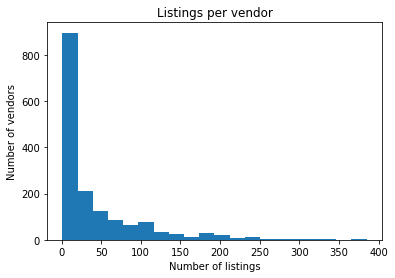

In [24]:
# Count number of listings for each vendor and create histogram
sales_by_vendor = data_df_f3['vendor_name'].groupby(data_df_f3['vendor_name']).count()
plt.hist(sales_by_vendor, bins = 20)
plt.xlabel('Number of listings')
plt.ylabel('Number of vendors')
plt.title('Listings per vendor')
plt.show()

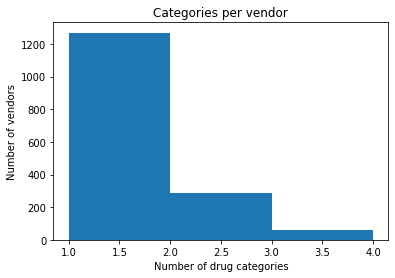

In [25]:
# Get list of vendors in dataframe
_ , vendor_list = pd.factorize(data_df_f3['vendor_name'])

# Function to count number of drugs per vendor
def countDrugsForVendor(vendor_name):
    return(len(data_df[data_df_f3['vendor_name'] == vendor_name].groupby('drug_prediction').count().index))

# Get number of drugs sold for each vendor
vendor_drug_counts = {vendor : countDrugsForVendor(vendor) for vendor in vendor_list}

# Make histogram of vendor_drug_counts
bins = range(1,max(vendor_drug_counts.values()))
plt.hist(list(vendor_drug_counts.values()), bins = bins)
plt.xlabel('Number of drug categories')
plt.ylabel('Number of vendors')
plt.title('Categories per vendor')
plt.show()

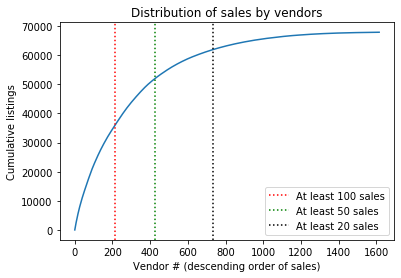

In [26]:
# Study the distribution of sales among vendors
# Sort vendors by number of sales
sales_sorted = sales_by_vendor.sort_values(ascending = False)
at_least_100_sales = np.where(sales_sorted == 100)[0][-1]
at_least_50_sales = np.where(sales_sorted == 50)[0][-1]
at_least_20_sales = np.where(sales_sorted == 20)[0][-1]

# Get cumulative sum of series
cumulative_sales = [np.sum(sales_sorted[:i]) for i in range(len(sales_sorted))]

# Plot number of vendors vs. number of listings
plt.plot(cumulative_sales)
plt.axvline(x=at_least_100_sales, color = 'r',linestyle = ':', label = 'At least 100 sales')
plt.axvline(x=at_least_50_sales, color = 'g',linestyle = ':', label = 'At least 50 sales')
plt.axvline(x=at_least_20_sales, color = 'k',linestyle = ':', label = 'At least 20 sales')
plt.xlabel('Vendor # (descending order of sales)')
plt.ylabel('Cumulative listings')
plt.title('Distribution of sales by vendors')
plt.legend()
plt.show()

## Filter out low-frequency drugs

drug_prediction
marijuana          18.05
cocaine            14.08
benzodiazepines    11.72
ecstasy             8.42
methamphetamine     6.45
hashish             5.90
others              5.84
heroin              5.03
lsd                 4.49
amphetamine         3.67
ketamine            3.46
psilocybin          2.92
oxycodone           2.52
dmt                 2.04
buprenorphine       1.53
inhalants           0.67
methadone           0.67
methylphenidate     0.65
two_cb              0.54
hydromorphone       0.45
codeine             0.29
morphine            0.22
fentanyl            0.12
clonidine           0.10
khat                0.08
oxymorphone         0.04
pcp                 0.02
kratom              0.01
mescaline           0.01
antidepressants     0.00
Name: drug_prediction, dtype: float64


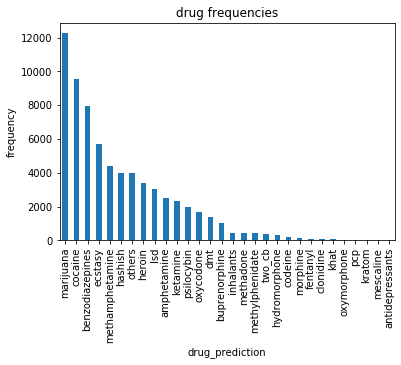

In [27]:
# Plot drug categories by popularity
drug_counts = data_df_f3['drug_prediction'].groupby(data_df_f3['drug_prediction']).count().sort_values(ascending = False)
drug_percents = round(100 * drug_counts/np.sum(drug_counts),2)

# For each drug, get percentage of the whole
print(drug_percents)

# Plot results
drug_counts.plot(kind = 'bar')
plt.ylabel('frequency')
plt.title('drug frequencies')
plt.show()

In [28]:
# Function checks if item is in the set
def isInSet(item, myset):
    return(item in myset)

# Get percentages for each drug
hi_freq_drugs = drug_percents[drug_percents > 1].index # Get names of drugs

# Check if row is high-frequency drug
is_hi_freq_row = data_df_f3['drug_prediction'].apply(isInSet, myset = hi_freq_drugs)
data_df_f3 = data_df_f3[is_hi_freq_row]

# Show percentage of each drug after filtering
drug_counts2 = data_df_f3['drug_prediction'].groupby(data_df_f3['drug_prediction']).count().sort_values(ascending = False)
100*drug_counts2/np.sum(drug_counts2)

drug_prediction
marijuana          18.777105
cocaine            14.650218
benzodiazepines    12.193702
ecstasy             8.761014
methamphetamine     6.706000
hashish             6.140526
others              6.074630
heroin              5.230251
lsd                 4.672439
amphetamine         3.821929
ketamine            3.599724
psilocybin          3.034250
oxycodone           2.618956
dmt                 2.123975
buprenorphine       1.595280
Name: drug_prediction, dtype: float64

## Filter out low-frequency vendors

In [29]:
# Threshold out vendors with less than given threshold of listings
min_sales = 300
sales_by_vendor_drugfiltered = data_df_f3['vendor_name'].groupby(data_df_f3['vendor_name']).count()
hi_freq_vendors = sales_by_vendor_drugfiltered[sales_by_vendor_drugfiltered > min_sales]
print('Vendors before thresholding: ', len(sales_by_vendor))
print('Vendors after thresholding: ', len(hi_freq_vendors))

#Calculate the ratio of listings for vendors > threshold
percentage_of_listings = np.sum(hi_freq_vendors)/np.sum(sales_by_vendor)
percent_of_vendors = len(hi_freq_vendors)/len(sales_by_vendor)
print('Percent of listings: ',percentage_of_listings)
print('Percent of vendors: ',percent_of_vendors)

# Average sales for the vendors with high frequency transactions
avg_sales = sum(hi_freq_vendors)/len(hi_freq_vendors)
print("Average sales: ", avg_sales)

Vendors before thresholding:  1616
Vendors after thresholding:  11
Percent of listings:  0.05472893341190336
Percent of vendors:  0.006806930693069307
Average sales:  337.72727272727275


In [30]:
# Function checks if item is in the set
def isInSet(item, myset):
    return(item in myset)

hi_freq_vendor_names = list(hi_freq_vendors.index)

# For every row, check if the vendor is in high-frequency set
is_hi_freq_row = data_df_f3['vendor_name'].apply(isInSet, myset = hi_freq_vendors.index)

# Get dataframe with just the high-frequency set
data_df_f3 = data_df_f3[is_hi_freq_row]

In [31]:
# Display: For each drugs, find out which vendor is selling and what the transaction volumn is.
drug_vendor_cnt = data_df_f3.groupby(['drug_prediction', 'vendor_name']).count()
print(drug_vendor_cnt)

                                  dates
drug_prediction vendor_name            
amphetamine     MercenaryGB          47
benzodiazepines DDUK-NDD            319
                StealthPharmacy     354
                bangalow             97
cocaine         Qualitywhitee        48
                pastrydam           315
ecstasy         Gladyman            154
                Qualitywhitee       174
hashish         MercenaryGB          75
heroin          TheLollipopGuild    170
ketamine        MercenaryGB         211
                MoonBanana          373
                Qualitywhitee       100
lsd             blueviking          342
methamphetamine TheLollipopGuild    135
others          Gladyman            175
                StealthPharmacy      31
                bangalow            278
psilocybin      Perfect.Shrooms     317


In [32]:
# Display: For each vendor, find out the listing drugs and its sales volumns.
vendor_drug_cnt = data_df_f3.groupby(['vendor_name', 'drug_prediction']).count()
print(vendor_drug_cnt)

                                  dates
vendor_name      drug_prediction       
DDUK-NDD         benzodiazepines    319
Gladyman         ecstasy            154
                 others             175
MercenaryGB      amphetamine         47
                 hashish             75
                 ketamine           211
MoonBanana       ketamine           373
Perfect.Shrooms  psilocybin         317
Qualitywhitee    cocaine             48
                 ecstasy            174
                 ketamine           100
StealthPharmacy  benzodiazepines    354
                 others              31
TheLollipopGuild heroin             170
                 methamphetamine    135
bangalow         benzodiazepines     97
                 others             278
blueviking       lsd                342
pastrydam        cocaine            315


## Rebuild dataset for HMM

In [13]:
# Rebuild the dataset for HMM training and testing
def dataset_split(data_df, rate=.75, verbose=True):
    # Input: data_df(dataframe); rate: split rate(float).
    if rate > 1.0 or rate < 0:
        return print("split rate must be within [0, 1]")
    # Sort dataset by "dates"
    data_df_sorted = data_df.sort_values(by = 'dates')
    #data_df_sorted = data_df_sorted[data_df_sorted['date'] > datetime(2018,10,1)] # select specific period 
    # Get total number of samples, and number of train/test samples
    n_samples = data_df_sorted.shape[0]
    n_train = round(n_samples * rate)
    # Create training/testing set
    train = data_df_sorted.iloc[:n_train,:]
    test = data_df_sorted.iloc[n_train:,:]
    if verbose:
        print('Total number of samples: ', n_samples)
        print('Training samples:        ', n_train)
        print('Testing samples:         ', n_samples - n_train)
    return train, test

# Make sure all vendors are balanced in both sets
def check_equal(train, test, f='vendor_name'):
    # Input (dataframe): training/testing set(dataframe), features_name(string)
    # Return (list): subset not in both
    _ , v_train_set = pd.factorize(train[f])
    _ , v_test_set = pd.factorize(test[f])
    # returns a new set which is the symmetric difference of two sets
    # https://www.programiz.com/python-programming/methods/set/symmetric_difference
    v_notboth = set(v_train_set).symmetric_difference(set(v_test_set))
    return list(v_notboth)

# Filter the data which are not in both set
def dataset_filter(train, test, f='vendor_name', verbose=True):
    # Input (dataframe): training/testing set(dataframe), features_name(string)
    # Return (dataframe): filtered training/testing set
    v_notboth = check_equal(train, test, f)
    if v_notboth != None:
        train_ft = train[~train[f].isin(v_notboth)]
        test_ft = test[~test[f].isin(v_notboth)]
    else:
        train_ft = train
        test_ft = test
    if verbose:
        print("Subset not in both: ", v_notboth)
        print('Training samples after filtering: ', len(train_ft))
        print('Testing samples after filtering:  ', len(test_ft))
    return train_ft, test_ft

# Split the dataset into training set and testing set by given split rate.
train, test = dataset_split(data_df_f3, rate=.75, verbose=True)
# Filter training set and testing set to make sure all vendors are equal.
train_ft, test_ft = dataset_filter(train, test, f='vendor_name', verbose=True)


Total number of samples:  3715
Training samples:         2786
Testing samples:          929
Subset not in both:  []
Training samples after filtering:  2786
Testing samples after filtering:   929


In [14]:
# Reshape
def dataset_reshape(dataset, rows, cols):
    # 按顺序截取部分数据，然后重塑形状。
    dataset_ = np.array(dataset)[0 : int(rows*cols)]
    return dataset_.reshape((rows, cols))

# Initialize parameters
n_train = 278
n_test = 92
len_seq = 10

# Reshape the training/testing set（v_train, d_train, v_test, d_test）
v_train = dataset_reshape(train_ft['vendor_name'], n_train, len_seq) # size = n_train x len_seq
d_train = dataset_reshape(train_ft['drug_prediction'], n_train, len_seq)
v_test = dataset_reshape(test_ft['vendor_name'], n_test, len_seq) # size = n_test x len_seq
d_test = dataset_reshape(test_ft['drug_prediction'], n_test, len_seq)

print("The shape of dataset: ", v_train.shape, d_train.shape, v_test.shape, d_test.shape)

The shape of dataset:  (278, 10) (278, 10) (92, 10) (92, 10)


## Compute emission probability

In [2]:
# Function gets tally of drugs sold for given vendor
def get_Drugs4Vendor(vendor_name, data_df=data_df_f3, fv='vendor_name', fd='drug_prediction'):
    # Input: data_df(dataframe), vendor_name(string), features_name*2(string).
    # Returns: series, representing proportion of total for each drug
    vendor_subset = data_df[data_df[fv] == vendor_name]
    vendor_drug_tally = vendor_subset[fd].groupby(vendor_subset[fd]).count()
    return(vendor_drug_tally/np.sum(vendor_drug_tally))

# Create emission probability table
def build_EmsProbTable(rows, cols, row_name='Vendor_Name'):
    # Input: rows/cols(list)-rows and columns for table, row_name(string).
    # Return: emission probability table(dataframe)
    ems_prob_table = pd.DataFrame(columns = cols) # Initilize the table with "cols" columns
    ems_prob_table.insert(0, row_name, rows) # Insert vendor list in 1st column
    ems_prob_table.iloc[:,1:] = ems_prob_table[row_name].apply(get_Drugs4Vendor)
    # Sort by Vendor name and fill NA values with 0
    ems_prob_table = ems_prob_table.sort_values(by = [row_name])
    ems_prob_table = ems_prob_table.fillna(0)
    return ems_prob_table

# Shift the ems_prob_table (dataframe) to array format
def convert_EmsProbTable(ems_prob_table):
    # Input: emission probability table(dataframe)
    # Return: emission probability(array)
    ems_prob = np.array(ems_prob_table)[:,1:]
    ems_prob = np.array(list(ems_prob[:, :]), dtype=np.float) # convert to float
    return ems_prob


NameError: name 'data_df_f3' is not defined

In [16]:
# Get the list of vendors and drugs
_ , vendor_list = pd.factorize(train_ft['vendor_name'])
_ , drug_list = pd.factorize(train_ft['drug_prediction'])

# Compute emission probability
ems_prob_table = build_EmsProbTable(vendor_list, drug_list, row_name='Vendor_Name')
ems_prob = convert_EmsProbTable(ems_prob_table)
ems_prob.shape


(11, 11)

In [1]:
ems_prob.shape

NameError: name 'ems_prob' is not defined

## Export the dataset

In [17]:
# Export the dataset
def dump_pickle(file_name, data):
    with open (file_name,'wb') as file:
        pickle.dump(data, file)

# File name
file_name1 = 'v_train.pkl'
file_name2 = 'd_train.pkl'
file_name3 = 'v_test.pkl'
file_name4 = 'd_test.pkl'
file_name5 = 'ems_prob.pkl'
file_name6 = 'EmsProbTable.csv'

# Dump to pickle file
dump_pickle(file_name1, v_train)
dump_pickle(file_name2, d_train)
dump_pickle(file_name3, v_test)
dump_pickle(file_name4, d_test)
dump_pickle(file_name5, ems_prob)

# Export to csv file
ems_prob_table.to_csv(file_name6, index = False)


### Check point 2

## Reload the dataset

In [18]:
# Reload the dataset
def read_pickle(file_name):
    with open (file_name,'rb') as file:
        return pickle.load(file)

# File name
file_name1 = 'v_train.pkl'
file_name2 = 'd_train.pkl'
file_name3 = 'v_test.pkl'
file_name4 = 'd_test.pkl'
file_name5 = 'ems_prob.pkl'
file_name6 = 'EmsProbTable.csv'

# Read the pickle file
v_train = read_pickle(file_name1)
d_train = read_pickle(file_name2)
v_test = read_pickle(file_name3)
d_test = read_pickle(file_name4)
ems_prob = read_pickle(file_name5)
ems_prob_table = pd.read_csv(file_name6)


## Build HMM models to estimate parameters and predict hidden state

In [19]:
from itertools import groupby
from operator import itemgetter
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

In [20]:
# 使用Baum-Welch算法来估计参数，然后使用Viterbi算法来预测隐状态数列。

def hmm_BaumWelch(data, n_states, n_iter=100, n_train=10):
    """
    @ parameters:
        data (matrix): The encoded observed sequence of hidden state
        n_states (int): The length of sequence for hidden state. 
        n_iter (int): The iteration of hmm.MultinomialHMM.
        n_train (int): The training times.
    @ return:
        start_prob (list): Start probability with size = 1 x n_states.
        trans_prob (matrix): Transition probability matrix with size = n_states x n_states.
    """
    # Check the input format
    if len(data) < 2 or len(data[0]) < 1:
        return print("The input dataset should be 2D.")
    if n_states < 1 or n_iter < 1 or n_train < 1:
        return print("Please input positive integer number for parameters.")
    # Initialize the parameters
    score0 = float("-inf")
    start_prob = 0
    trans_prob = 0
    # Build the model
    model = hmm.MultinomialHMM(n_components=n_states, n_iter=int(n_iter))
    # Run "n_train" times to train the model and select the best parameters.
    for _ in range(0, int(n_train)):
        model.fit(data) # 模型的拟合比较耗时
        print("Model fitted in round {0}!".format(_))
        # hmm2.0里的score函数接受2D作为输入格式
        scores = sum([model.score([data[i]]) for i in range(len(data))]) #score越大越好（若带负号，则绝对值越小越好）
        print(scores)
        if scores > score0:
            start_prob = model.startprob_
            trans_prob = model.transmat_  
            # 发射概率已知，这里无须估计。
        score0 = max(score0, scores)
    return start_prob, trans_prob

# https://stackoverflow.com/questions/34379911/how-to-run-hidden-markov-models-in-python-with-hmmlearn
def hmm_Viterbi(obs_seq, start_prob, trans_prob, ems_prob, n_states, n_train=10, verbose=True):
    """
    @ parameters:
        obs_seq (list): An encoded observed sequence of hidden state.
        start_prob (list): Start probability with size = 1 x n_states.
        trans_prob (matrix): Transition probability matrix with size = n_states x n_states.
        ems_prob (matrix): Emission probability with size = len(vlist) x len(dlist).
        n_states (int): The length of sequence for hidden state. 
        n_train (int): The training times.
        verbose (boolean): Print out the comment if True.
    @ return:
        vendor0 (list): Predicted sequence of hidden state.
    """
    # Check the input format
    if len(obs_seq) < 1:
        return print("The length of observed sequence should be larger than 1.")
    if n_states < 1 or n_train < 1:
        return print("Please input positive integer number for parameters.")
    if n_states != (len(trans_prob) or len(trans_prob[0])):
        return print("The size of trans_prob is not correct.")
    if len(start_prob) != len(trans_prob):
        return print("The size of start_prob and trans_prob doesn't match.")    
    # Build the model and initialize the parameters
    model = hmm.MultinomialHMM(n_components=n_states)
    model.startprob_= start_prob
    model.transmat_ = trans_prob
    model.emissionprob_ = ems_prob
    logprob0 = float("-inf")
    vendor0 = 0
    # Run "n_train" times to train the model and select the best parameters.
    for _ in range(0, int(n_train)):
        # decode: Given parameters and observed sequence, employ Viterbi algorithm to predict the hidden state.
        logprob, vendors = model.decode(list(obs_seq), algorithm="viterbi") # obs_seq must be list rather than array.
        if logprob > logprob0: # update "vendors" when logprob is larger than previous one.
            vendor0 = vendors
        logprob0 = max(logprob0, logprob)
    if verbose:
        print("The best logprob is: ", logprob0) #该参数反映模型拟合的好坏,数值越大越好。
    return vendor0

def seq_encoded(observations, obs_seq):
    # 遍历观测数列，若该项在观测状态里，则返回其索引作为初级编码（加密后元素须为整数）。
    # 获得初级编码数列后，用LabelEncoder再进行编码。
    # ps: 通过LabelEncoder的inverse_transform函数可解码（转换回初级编码）。
    return LabelEncoder().fit_transform([observations.index(obs_seq[i]) for i in range(len(obs_seq)) if obs_seq[i] in observations]) 

def data_encoded(observations, data_dseq):
    # 调用上述编码函数对整个观测数据集进行编码。
    return [seq_encoded(observations, data_dseq[i]) for i in range(len(data_dseq))]

def evaluation(hs_seq_pred, hs_seq_gt, verbose=True):
    # 评价预测结果：Compute the accuracy
    if verbose:
        print("The set of predicted hidden state sequence: \n", set(hs_seq_pred))
        print("-"*90)
        print("The set of groundtruth hidden state sequence: \n", set(hs_seq_gt))
    cnt = 0
    for i in range(len(hs_seq_pred)):
        if hs_seq_pred[i] == hs_seq_gt[i]:
            cnt += 1
    return round(cnt/len(hs_seq_pred), 4)


In [25]:
# 训练HMM：给定初始参数，使用Baum-Welch算法来估计参数。

# Initialize the parameters
"""
# parameters for quick demo:
states = ["vendor 1", "vendor 2", "vendor 3", "vendor 4", "vendor 5"]
observations = ["drug1", "drug2", "drug3"]
data_dseq_ec = np.array([[0,1,0,2,1,2],
                         [0,2,1,1,0,2],
                         [0,0,1,1,2,1]]) # three drugs: 0,1,2
ems_prob = np.array([[9.97860613e-01, 2.13881271e-03, 5.74009958e-07],
                     [4.41131862e-05, 9.99955887e-01, 4.05913054e-34],
                     [1.80783778e-01, 2.04285247e-01, 6.14930975e-01],
                     [7.72785012e-06, 9.99992272e-01, 4.43047659e-40],
                     [7.55409261e-14, 1.00000000e+00, 1.39151157e-53]])
"""
vlist = list(np.array(ems_prob_table)[:,0])
dlist = list(ems_prob_table.columns.values[1:])
states = vlist
observations = dlist
# encode the observed dataset
#data_dseq_ec = data_encoded(observations, data_dseq) # synthetic
data_dseq_ec = data_encoded(observations, d_train) # real
data_dseq_ec = np.array(data_dseq_ec)

# Employ Baum-Welch algorithm to estimate the parameters
start_prob, trans_prob = hmm_BaumWelch(data_dseq_ec, len(states), n_iter=50, n_train=10)
print("start probability ∏: \n", start_prob)
print("transition probability A: \n", trans_prob[0:20])
print("emission probability B: \n", ems_prob[0:20])


Model fitted in round 0!
-4912.1619011957055
Model fitted in round 1!
-5045.474197004431
Model fitted in round 2!
-5168.993663858553
Model fitted in round 3!
-4953.652330486758
Model fitted in round 4!
-5005.202426572197
Model fitted in round 5!
-5197.927048828473
Model fitted in round 6!
-5015.322053370896
Model fitted in round 7!
-5053.657861288949
Model fitted in round 8!
-5108.018404144916
Model fitted in round 9!
-5165.641186592832
start probability ∏: 
 [5.06727045e-52 2.42684957e-67 3.65497828e-02 1.57837758e-60
 2.29737465e-84 1.23466136e-02 9.51103604e-01 6.77219865e-28
 3.11009060e-17 7.26703121e-21 1.57291763e-11]
transition probability A: 
 [[0.37027698 0.10864324 0.09394258 0.1277528  0.00511596 0.0486823
  0.05227244 0.05219914 0.10585855 0.00876163 0.0264944 ]
 [0.07526932 0.41547596 0.02825542 0.00396052 0.03196943 0.05513614
  0.04069732 0.15341206 0.03287684 0.11137702 0.05156997]
 [0.03337541 0.16321409 0.09130903 0.03362437 0.01201965 0.13576766
  0.17465217 0.06948

## Save the parameters

In [22]:
# Export the dataset
def dump_pickle(file_name, data):
    with open (file_name,'wb') as file:
        pickle.dump(data, file)

# File name
file_name1 = 'start_prob.pkl'
file_name2 = 'trans_prob.pkl'

# Save the parameters to pickle file
dump_pickle(file_name1, start_prob)
dump_pickle(file_name2, trans_prob)


### Check point 2.1

## Reload the parameters

In [23]:
# Read parameters' file
# File name
file_name1 = 'start_prob.pkl'
file_name2 = 'trans_prob.pkl'

# Read the pickle file
start_prob = read_pickle(file_name1)
trans_prob = read_pickle(file_name2)


In [26]:
# 测试：预测和评价
def testing(test_obs, test_hs, idx, verbose=True):
    obs_seq = test_obs[idx]
    obs_seq_ec = seq_encoded(observations, obs_seq) # encode the observed sequence
    obs_seq_ec = obs_seq_ec.reshape((len(obs_seq_ec), 1)) # hmm2.0版需要加这行
    # obs_seq_ec = [2, 0, 1, 1, 2, 0] # 这里需使用list而非array

    # Employ Viterbi algorithm to estimate the parameters
    vendors = hmm_Viterbi(obs_seq_ec, start_prob, trans_prob, ems_prob, len(states), n_train=100, verbose=True)

    # Present the result: drugs - vendors
    obs_seq0 = [observations.index(obs_seq[i]) for i in range(len(obs_seq)) if obs_seq[i] in observations] # 初级编码
    print("Observed Drugs: \n", ", ".join(map(lambda x: observations[x], list(obs_seq0)))) if verbose else 0
    print("Predicted Vendors: \n", ", ".join(map(lambda x: states[x], vendors))) if verbose else 0 # 输出预测结果

    # Evaluation（对预测结果进行评价-accuracy）
    hs_seq_pred = [states[vendors[i]] for i in range(len(vendors))]
    hs_seq_gt = test_hs[idx]
    print("Ground Truth: \n", hs_seq_gt) if verbose else 0 # 输出groundtruth
    acc = evaluation(hs_seq_pred, hs_seq_gt, verbose=False)
    print("The accuracy of sequence No.{0} is: {1} \n".format(idx, acc))


# 测试真实数据
# Scenario1: randomly select 20% samples from the training set.
#test_idx = np.random.randint(0, len(d_train), int(len(d_train)*0.2))
#test_real1 = [testing(d_train, v_train, idx) for idx in test_idx]

# Scenario2: select first 20% samples from the training set.
#test_idx = [idx for idx in range(len(d_train[: int(len(d_train)*0.2)]))]
#test_real2 = [testing(d_train, v_train, idx) for idx in test_idx]

# Scenario3: select all samples from the testing set.
test_real3 = [testing(d_test, v_test, idx, verbose=True) for idx in range(len(d_test))]


/Users/junzhuang/anaconda/lib/python3.6/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


The best logprob is:  -19.41564307168825
Observed Drugs: 
 ecstasy, psilocybin, psilocybin, ketamine, psilocybin, psilocybin, psilocybin, lsd, psilocybin, ketamine
Predicted Vendors: 
 StealthPharmacy, blueviking, blueviking, pastrydam, blueviking, blueviking, blueviking, StealthPharmacy, blueviking, pastrydam
Ground Truth: 
 ['Gladyman' 'Perfect.Shrooms' 'Perfect.Shrooms' 'MoonBanana'
 'Perfect.Shrooms' 'Perfect.Shrooms' 'Perfect.Shrooms' 'blueviking'
 'Perfect.Shrooms' 'MoonBanana']
The accuracy of sequence No.0 is: 0.0 

The best logprob is:  -19.824715229785635
Observed Drugs: 
 ketamine, cocaine, ecstasy, ketamine, ketamine, heroin, heroin, heroin, heroin, others
Predicted Vendors: 
 StealthPharmacy, StealthPharmacy, blueviking, bangalow, bangalow, MoonBanana, MoonBanana, MoonBanana, MoonBanana, pastrydam
Ground Truth: 
 ['MoonBanana' 'pastrydam' 'Qualitywhitee' 'MercenaryGB' 'MercenaryGB'
 'TheLollipopGuild' 'TheLollipopGuild' 'TheLollipopGuild'
 'TheLollipopGuild' 'bangalow']
Th

The best logprob is:  -25.531814604974702
Observed Drugs: 
 lsd, others, hashish, hashish, benzodiazepines, benzodiazepines, ketamine, heroin, benzodiazepines, ecstasy
Predicted Vendors: 
 StealthPharmacy, pastrydam, Qualitywhitee, Qualitywhitee, StealthPharmacy, StealthPharmacy, blueviking, MercenaryGB, StealthPharmacy, MercenaryGB
Ground Truth: 
 ['blueviking' 'Gladyman' 'MercenaryGB' 'MercenaryGB' 'DDUK-NDD' 'DDUK-NDD'
 'MercenaryGB' 'TheLollipopGuild' 'bangalow' 'Gladyman']
The accuracy of sequence No.18 is: 0.0 

The best logprob is:  -61.61397204827666
Observed Drugs: 
 psilocybin, psilocybin, psilocybin, psilocybin, psilocybin, ketamine, others, others, ketamine, ecstasy
Predicted Vendors: 
 blueviking, blueviking, blueviking, blueviking, blueviking, pastrydam, StealthPharmacy, StealthPharmacy, pastrydam, bangalow
Ground Truth: 
 ['Perfect.Shrooms' 'Perfect.Shrooms' 'Perfect.Shrooms' 'Perfect.Shrooms'
 'Perfect.Shrooms' 'MoonBanana' 'Gladyman' 'Gladyman' 'MoonBanana'
 'Gladyman'

The best logprob is:  -20.002374118591355
Observed Drugs: 
 ketamine, ecstasy, ecstasy, benzodiazepines, psilocybin, psilocybin, psilocybin, benzodiazepines, ketamine, lsd
Predicted Vendors: 
 StealthPharmacy, blueviking, blueviking, DDUK-NDD, MoonBanana, MoonBanana, MoonBanana, bangalow, bangalow, pastrydam
Ground Truth: 
 ['MoonBanana' 'Gladyman' 'Gladyman' 'StealthPharmacy' 'Perfect.Shrooms'
 'Perfect.Shrooms' 'Perfect.Shrooms' 'DDUK-NDD' 'MoonBanana' 'blueviking']
The accuracy of sequence No.35 is: 0.0 

The best logprob is:  -21.37869533180323
Observed Drugs: 
 ecstasy, ecstasy, others, others, others, lsd, lsd, others, others, hashish
Predicted Vendors: 
 StealthPharmacy, Gladyman, DDUK-NDD, DDUK-NDD, DDUK-NDD, pastrydam, pastrydam, StealthPharmacy, StealthPharmacy, blueviking
Ground Truth: 
 ['Qualitywhitee' 'Qualitywhitee' 'bangalow' 'bangalow' 'bangalow'
 'blueviking' 'blueviking' 'bangalow' 'bangalow' 'MercenaryGB']
The accuracy of sequence No.36 is: 0.0 

The best logprob is

The best logprob is:  -26.878403471483892
Observed Drugs: 
 others, others, benzodiazepines, benzodiazepines, benzodiazepines, ecstasy, psilocybin, others, others, ketamine
Predicted Vendors: 
 Qualitywhitee, pastrydam, StealthPharmacy, StealthPharmacy, StealthPharmacy, blueviking, MercenaryGB, pastrydam, pastrydam, bangalow
Ground Truth: 
 ['bangalow' 'bangalow' 'bangalow' 'bangalow' 'bangalow' 'Gladyman'
 'Perfect.Shrooms' 'Gladyman' 'Gladyman' 'MoonBanana']
The accuracy of sequence No.51 is: 0.0 

The best logprob is:  -17.814527885098006
Observed Drugs: 
 benzodiazepines, psilocybin, psilocybin, psilocybin, psilocybin, others, ketamine, ketamine, heroin, heroin
Predicted Vendors: 
 StealthPharmacy, MoonBanana, MoonBanana, MoonBanana, MoonBanana, pastrydam, Gladyman, Gladyman, blueviking, blueviking
Ground Truth: 
 ['StealthPharmacy' 'Perfect.Shrooms' 'Perfect.Shrooms' 'Perfect.Shrooms'
 'Perfect.Shrooms' 'StealthPharmacy' 'MoonBanana' 'MercenaryGB'
 'TheLollipopGuild' 'TheLollipopG

The best logprob is:  -27.2549699149505
Observed Drugs: 
 ketamine, ecstasy, heroin, methamphetamine, others, benzodiazepines, ketamine, heroin, benzodiazepines, psilocybin
Predicted Vendors: 
 StealthPharmacy, blueviking, MercenaryGB, MercenaryGB, pastrydam, bangalow, bangalow, MercenaryGB, StealthPharmacy, Gladyman
Ground Truth: 
 ['MoonBanana' 'Qualitywhitee' 'TheLollipopGuild' 'TheLollipopGuild'
 'Gladyman' 'DDUK-NDD' 'Qualitywhitee' 'TheLollipopGuild'
 'StealthPharmacy' 'Perfect.Shrooms']
The accuracy of sequence No.67 is: 0.1 

The best logprob is:  -21.750708331304274
Observed Drugs: 
 psilocybin, benzodiazepines, benzodiazepines, ketamine, ketamine, ketamine, ketamine, ketamine, ketamine, ketamine
Predicted Vendors: 
 StealthPharmacy, StealthPharmacy, StealthPharmacy, pastrydam, pastrydam, pastrydam, pastrydam, pastrydam, pastrydam, pastrydam
Ground Truth: 
 ['Perfect.Shrooms' 'DDUK-NDD' 'DDUK-NDD' 'MoonBanana' 'MoonBanana'
 'MoonBanana' 'MoonBanana' 'MoonBanana' 'MoonBanana' '

 ['MoonBanana' 'MoonBanana' 'MoonBanana' 'MoonBanana' 'MoonBanana'
 'MoonBanana' 'MoonBanana' 'MoonBanana' 'Gladyman' 'Gladyman']
The accuracy of sequence No.83 is: 0.0 

The best logprob is:  -16.06359917103677
Observed Drugs: 
 lsd, lsd, lsd, ecstasy, ecstasy, ecstasy, psilocybin, psilocybin, ketamine, ketamine
Predicted Vendors: 
 StealthPharmacy, StealthPharmacy, StealthPharmacy, Gladyman, Gladyman, Gladyman, blueviking, blueviking, pastrydam, pastrydam
Ground Truth: 
 ['blueviking' 'blueviking' 'blueviking' 'Qualitywhitee' 'Qualitywhitee'
 'Qualitywhitee' 'Perfect.Shrooms' 'Perfect.Shrooms' 'MoonBanana'
 'MoonBanana']
The accuracy of sequence No.84 is: 0.0 

The best logprob is:  -64.92430421548649
Observed Drugs: 
 ketamine, benzodiazepines, others, ecstasy, lsd, others, ketamine, ketamine, ketamine, ketamine
Predicted Vendors: 
 blueviking, StealthPharmacy, pastrydam, MercenaryGB, bangalow, pastrydam, blueviking, blueviking, blueviking, blueviking
Ground Truth: 
 ['MoonBanana' '

## Preprocess the price feature

In [33]:
import pickle

file = open('drug_data.pkl','rb')
pr_mkt_drg_new = pickle.load(file)
file.close()

In [35]:
pr_mkt_drg_new.head()

,trans_id,mkt_id,vendor_id,vendor_name,buyer_name,rating,comment,post_date,bitcoin_amt,USD,product_title,dates,tokenized_titles,drug_prediction
9430,'10528,1,590,superclr,#####,5.0,Vendor did a great job 5 across the board exce...,20181102064301,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",heroin
9431,'10529,1,590,superclr,#####,5.0,GREAT,20181110064301,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,"[5, grams, grade, aaa+, cartel, tan, powder, h...",heroin
9435,'10533,1,92,OnionKings,#####,5.0,Toppklass!! Snabb leverans. Allt perfekt!!!,20181221064311,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-21 06:43:11,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",benzodiazepines
9437,'10535,1,92,OnionKings,#####,5.0,Enter your comments here,20181222064311,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-22 06:43:11,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",benzodiazepines
9439,'10537,1,92,OnionKings,#####,5.0,Perfekt!,20181201064311,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-01 06:43:11,"[rivotril, 2, mg, från, apotek, (, roche, ), [...",benzodiazepines


In [108]:
import pandas as pd
import numpy as np

# Load BTC-USD historical price (from Yahoo Finance)
filePath_btc = 'btc_forex.csv'
btc_price = pd.read_csv(filePath_btc)
btc_price = np.array(btc_price)

def parseDate2(raw_date, pattern = '%Y-%m-%d'):
    string_date = str(raw_date)
    return(datetime.strptime(string_date, pattern).date())
dates_parsed = [parseDate2(date).date() for date in btc_price[:,0]]


btc_date = [parseDate2(date) for date in btc_price[:,0]] # shift the date format to string
dict_btc = dict(zip(btc_date, btc_price[:,1])) # store the bitcoin price as dict

# match the bitcoin historical price to our date features and shift the bitcoin amount to USD
# for _, row in pr_mkt_drg_new.iterrows():
#     print(row['c1'], row['c2'])
for index,row in pr_mkt_drg_new.iterrows():
    print(index)
    if pr_mkt_drg_new.loc[index,'bitcoin_amt'] != '-1':
        #if pr_mkt_Date[i] not in '19691231':
        if pr_mkt_Date[index] in set(dict_btc.keys()):
            pr_mkt_drg_new[i][-3] = round(float(pr_mkt_drg_new.loc[index,'bitcoin_amt'])*dict_btc.get(pr_mkt_Date[i]), 2)
    else:
        pr_mkt_drg_new[i][-3] = 0

# combine two price together
pr_mkt_Price = []
for i in range(len(pr_mkt_drg_new)):
    if pr_mkt_drg_new[i][-2] != '-1':
        pr_mkt_Price.append(pr_mkt_drg_new[i][-2])
    if pr_mkt_drg_new[i][-3] != '-1':
        pr_mkt_Price.append(pr_mkt_drg_new[i][-3])

print(pr_mkt_Price)

AttributeError: 'datetime.date' object has no attribute 'date'

In [107]:
dict_btc

{datetime.datetime(2010, 7, 16, 0, 0): 0.049510000000000005,
 datetime.datetime(2010, 7, 17, 0, 0): 0.049510000000000005,
 datetime.datetime(2010, 7, 18, 0, 0): 0.08584,
 datetime.datetime(2010, 7, 19, 0, 0): 0.0808,
 datetime.datetime(2010, 7, 20, 0, 0): 0.07474,
 datetime.datetime(2010, 7, 21, 0, 0): 0.07921,
 datetime.datetime(2010, 7, 22, 0, 0): 0.0505,
 datetime.datetime(2010, 7, 23, 0, 0): 0.06262000000000001,
 datetime.datetime(2010, 7, 24, 0, 0): 0.05454,
 datetime.datetime(2010, 7, 25, 0, 0): 0.0505,
 datetime.datetime(2010, 7, 26, 0, 0): 0.056,
 datetime.datetime(2010, 7, 27, 0, 0): 0.06,
 datetime.datetime(2010, 7, 28, 0, 0): 0.0589,
 datetime.datetime(2010, 7, 29, 0, 0): 0.0699,
 datetime.datetime(2010, 7, 30, 0, 0): 0.0627,
 datetime.datetime(2010, 7, 31, 0, 0): 0.06785,
 datetime.datetime(2010, 8, 1, 0, 0): 0.0611,
 datetime.datetime(2010, 8, 2, 0, 0): 0.06,
 datetime.datetime(2010, 8, 3, 0, 0): 0.06,
 datetime.datetime(2010, 8, 4, 0, 0): 0.057,
 datetime.datetime(2010, 8

In [91]:
d = list(pr_mkt_drg_new['dates'])[:3]
d2 = [a_date.date() for a_date in d]

In [92]:
d2

[datetime.date(2018, 11, 2),
 datetime.date(2018, 11, 10),
 datetime.date(2018, 12, 21)]

In [102]:
a_date = pr_mkt_drg_new.loc[9430,'dates']
# pr_mkt_drg_new.head()
# a_date.year
btc_price[:,0]
def parseDate2(raw_date, pattern = '%Y-%m-%d'):
    string_date = str(raw_date)
    return(datetime.strptime(string_date, pattern).date())
dates_parsed = [parseDate2(date) for date in btc_price[:,0]]

In [97]:
dates_parsed

[datetime.date(2010, 7, 16),
 datetime.date(2010, 7, 17),
 datetime.date(2010, 7, 18),
 datetime.date(2010, 7, 19),
 datetime.date(2010, 7, 20),
 datetime.date(2010, 7, 21),
 datetime.date(2010, 7, 22),
 datetime.date(2010, 7, 23),
 datetime.date(2010, 7, 24),
 datetime.date(2010, 7, 25),
 datetime.date(2010, 7, 26),
 datetime.date(2010, 7, 27),
 datetime.date(2010, 7, 28),
 datetime.date(2010, 7, 29),
 datetime.date(2010, 7, 30),
 datetime.date(2010, 7, 31),
 datetime.date(2010, 8, 1),
 datetime.date(2010, 8, 2),
 datetime.date(2010, 8, 3),
 datetime.date(2010, 8, 4),
 datetime.date(2010, 8, 5),
 datetime.date(2010, 8, 6),
 datetime.date(2010, 8, 7),
 datetime.date(2010, 8, 8),
 datetime.date(2010, 8, 9),
 datetime.date(2010, 8, 10),
 datetime.date(2010, 8, 11),
 datetime.date(2010, 8, 12),
 datetime.date(2010, 8, 13),
 datetime.date(2010, 8, 14),
 datetime.date(2010, 8, 15),
 datetime.date(2010, 8, 16),
 datetime.date(2010, 8, 17),
 datetime.date(2010, 8, 18),
 datetime.date(2010, 8,

## Generate synthetic datasets

In [ ]:
"""
References：
    https://en.wikipedia.org/wiki/Exponential_distribution
    https://en.wikipedia.org/wiki/Inverse_transform_sampling
"""

# Employ inverse transform sampling method to generate a datapoint in exponential distribution. 
def its2ed(avg_sale_frq_list, vidx):
    """
    @ parameters:
        avg_sale_frq_list (list): the list of average sale (Need to have the list before)
        vdix (int): the index of avg_sale_frq_list
    @ return:
        x_0 (float): datapoint in exponential distribution
    """
    y_0 = np.random.uniform(0,1)
    # x = -(1/lambda)*ln(1-y), where lambda = 1/E[x] = 1/avg_sale_frq_list[vidx][1].
    x_0 = -avg_sale_frq_list[vidx][1]*np.log(y_0)
    return x_0

# Generate dataset with "n_samples" instances.
# Each instance has "len_seq" datapoints. 
# All datapoints are from "n_vendors" distinct exponential distributions.
def gen_vendor_seq(avg_sale_frq_list, n_samples=1000, len_seq=100, n_vendors=5, verbose=True):
    """
    @ parameters:
        avg_sale_frq_list (list): the list of average sale
        n_samples (int): number of samples
        len_seq (int): length of sequence
        n_vendors (int): the datapoints comes from n vendors (n distributions)
        verbose (boolean): output if verbose
    @ return:
        dataset (matrix): generated dataset with size = n_samples x len_seq
    """
    # 放在这生成表示了整个数据集均在以下n个指数分布内
    vidx_n = np.random.randint(0, len(avg_sale_frq_list), n_vendors) # 随机选择n个卖家用于生成n个不同的指数分布
    vname_n = np.array(avg_sale_frq_list)[:, 0][vidx_n] # 返回这n个卖家的名字列表
    if verbose:
        avgsale_n = np.array(avg_sale_frq_list)[:, 1][vidx_n] # 返回这n个卖家的平均销量列表
        # 计算lambda值；注：转array后平均销量会变为字符串，须转回浮点数。
        lambda_n = [round(1./float(avgsale_n[i]), 4) for i in range(len(avgsale_n))] 
        print("The lambda values: ", lambda_n)

    dataset = []
    for _ in range(n_samples):
        seq = []
        for _ in range(len_seq): # 共生成“len_seq”
            time_values = []
            for v in range(len(vidx_n)): # 遍历n个卖家
                x_0 = its2ed(avg_sale_frq_list, vidx_n[v]) # 用该卖家对应的参数lambda来生成一个服从指数分布的数据点
                time_values.append([x_0, vname_n[v]]) # 将每个卖家的[时间点，卖家名]插入到time_values列表里
            time_values.sort() # 将[时间点，卖家名]的pair按时间点大小进行排序
            seq.append(time_values[0][1]) # 将最小时间点所对应的卖家名插入到数列里
        dataset.append(seq)
    return dataset


if __name__ == '__main__':
    # Initialize the parameters
    n_samples = 100
    len_seq = 100
    n_vendors = 100
    # Generate a vendor sequence of hidden state
    data_vseq = gen_vendor_seq(avg_sale_frq_list, n_samples, len_seq, n_vendors, verbose=True)
    #data_vseq
    # Output the dataset to txt file
    #output_path = 'data_vseq({0}x{1})_{2}v.txt'.format(n_samples, len_seq, n_vendors)
    #saveOutput(output_path, data_vseq)


In [ ]:

def gen_drug_seq(data_vseq, vlist, dlist, emission_prob):
    """
    @ parameters:
        data_vseq (matrix): hidden state matrix
        vlist (list): list of vendors
        dlist (list): list of drugs
        emission_prob (matrix): emission probability with size = len(vlist) x len(dlist)。
    @ return:
        dataset (matrix): generated dataset
    """
    # Check the size of input matrix
    if len(vlist) != len(emission_prob):
        return print("The length of vendor list is not equal to the number of rows in emission probability matrix.")
    if len(dlist) != len(emission_prob[0]):
        return print("The length of drug list is not equal to the number of columns in emission probability matrix.")
    # Define the size of dataset
    n_samples = len(data_vseq) # "n_samples" sequence
    len_seq = len(data_vseq[0]) # "len_seq" timestamps in each sequence

    dataset = []
    for s in range(n_samples):
        seq = []
        for t in range(len_seq):
            ep_idx = vlist.index(data_vseq[s][t]) # 获得第s条数列的第t个时戳上的卖家在“卖家名单”上的索引
            emprob = emission_prob[ep_idx] # 通过上述索引找到该卖家在发射概率矩阵上所对应的发射概率
            drug_onehot = np.random.multinomial(1, emprob) # 以多项式分布来生成drug的onehot列表，如：[0,1,...,0].
            # 以上述onehot列表里“1”所对应的索引从“毒品名单“上获取对应的位置毒品名
            drug = [dlist[list(drug_onehot).index(drug_onehot[i])] for i in range(len(drug_onehot)) if drug_onehot[i] == 1]
            seq.append(drug[0]) # drug[0]表示去掉“[]”而已
        dataset.append(seq)
    return dataset


if __name__ == '__main__':
    # Generate a drug sequence of observation
    data_dseq = gen_drug_seq(data_vseq, vlist, dlist, ems_prob) # dlist(24), vlist(213), em_prob(213, 24)
    #data_dseq
    # Output the dataset to txt file
    #output_path = 'data_dseq({0}x{1})_emprob({2}x{3}).txt'.format(len(data_vseq), len(data_vseq[0]), len(em_prob), len(em_prob[0]))
    #saveOutput(output_path, data_dseq)
